In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys


In [25]:
sys.path.append("../..")
sys.path.append("..")

from analysis.multi_plot_utils import multi_disp_learn_hist, multi_compute_roc, multi_plot_roc
from analysis.comparison_utils import multi_get_masked_data, multi_collapse_test_output

from test_utils import test_collapse_test_output, prep_roc_data, plot_multiple_ROC


In [26]:
%load_ext autoreload
%matplotlib inline
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
############# define plotting params #############
c = plt.rcParams['axes.prop_cycle'].by_key()['color']
label_dict = {"$\gamma$":0, "$e$":1, "$\mu$":2}
inverse_label_dict = {0:"$\gamma$", 1:"$e$", 2:"$\mu$"}

In [28]:
############# define run locations #############
locs = ['/home/jtindall/WatChMaL/outputs/2020-10-17/1_gpu_new_run_1/outputs',
        '/home/jtindall/WatChMaL/outputs/2020-10-17/1_gpu_new_run_2/outputs',
        '/home/jtindall/WatChMaL/outputs/2020-10-17/1_gpu_new_run_2/outputs'
       ]
"""
['/home/jtindall/WatChMaL/outputs/2020-10-14/one_gpu/outputs',
        '/home/jtindall/WatChMaL/outputs/2020-10-17/1_gpu_new_run_1/outputs',
        '/home/jtindall/WatChMaL/outputs/2020-10-22/15-36-22/outputs'
       ]
"""
"""
'/home/jtindall/WatChMaL/outputs/2020-10-17/1_gpu_new_run_1/outputs',
       '/home/jtindall/WatChMaL/outputs/2020-10-17/1_gpu_new_run_2/outputs'
"""

titles = ['New Framework Run 1',
          'New Framework Run 2',
          'New Framework Run 3'
         ]

linecolor = [c[0],c[1],c[2]]
linestyle = ['-.','.','--']

i:  0
Found training logs:  ['/home/jtindall/WatChMaL/outputs/2020-10-17/1_gpu_new_run_1/outputs/log_train_0.csv']
i:  1
Found training logs:  ['/home/jtindall/WatChMaL/outputs/2020-10-17/1_gpu_new_run_2/outputs/log_train_0.csv']
i:  2
Found training logs:  ['/home/jtindall/WatChMaL/outputs/2020-10-17/1_gpu_new_run_2/outputs/log_train_0.csv']


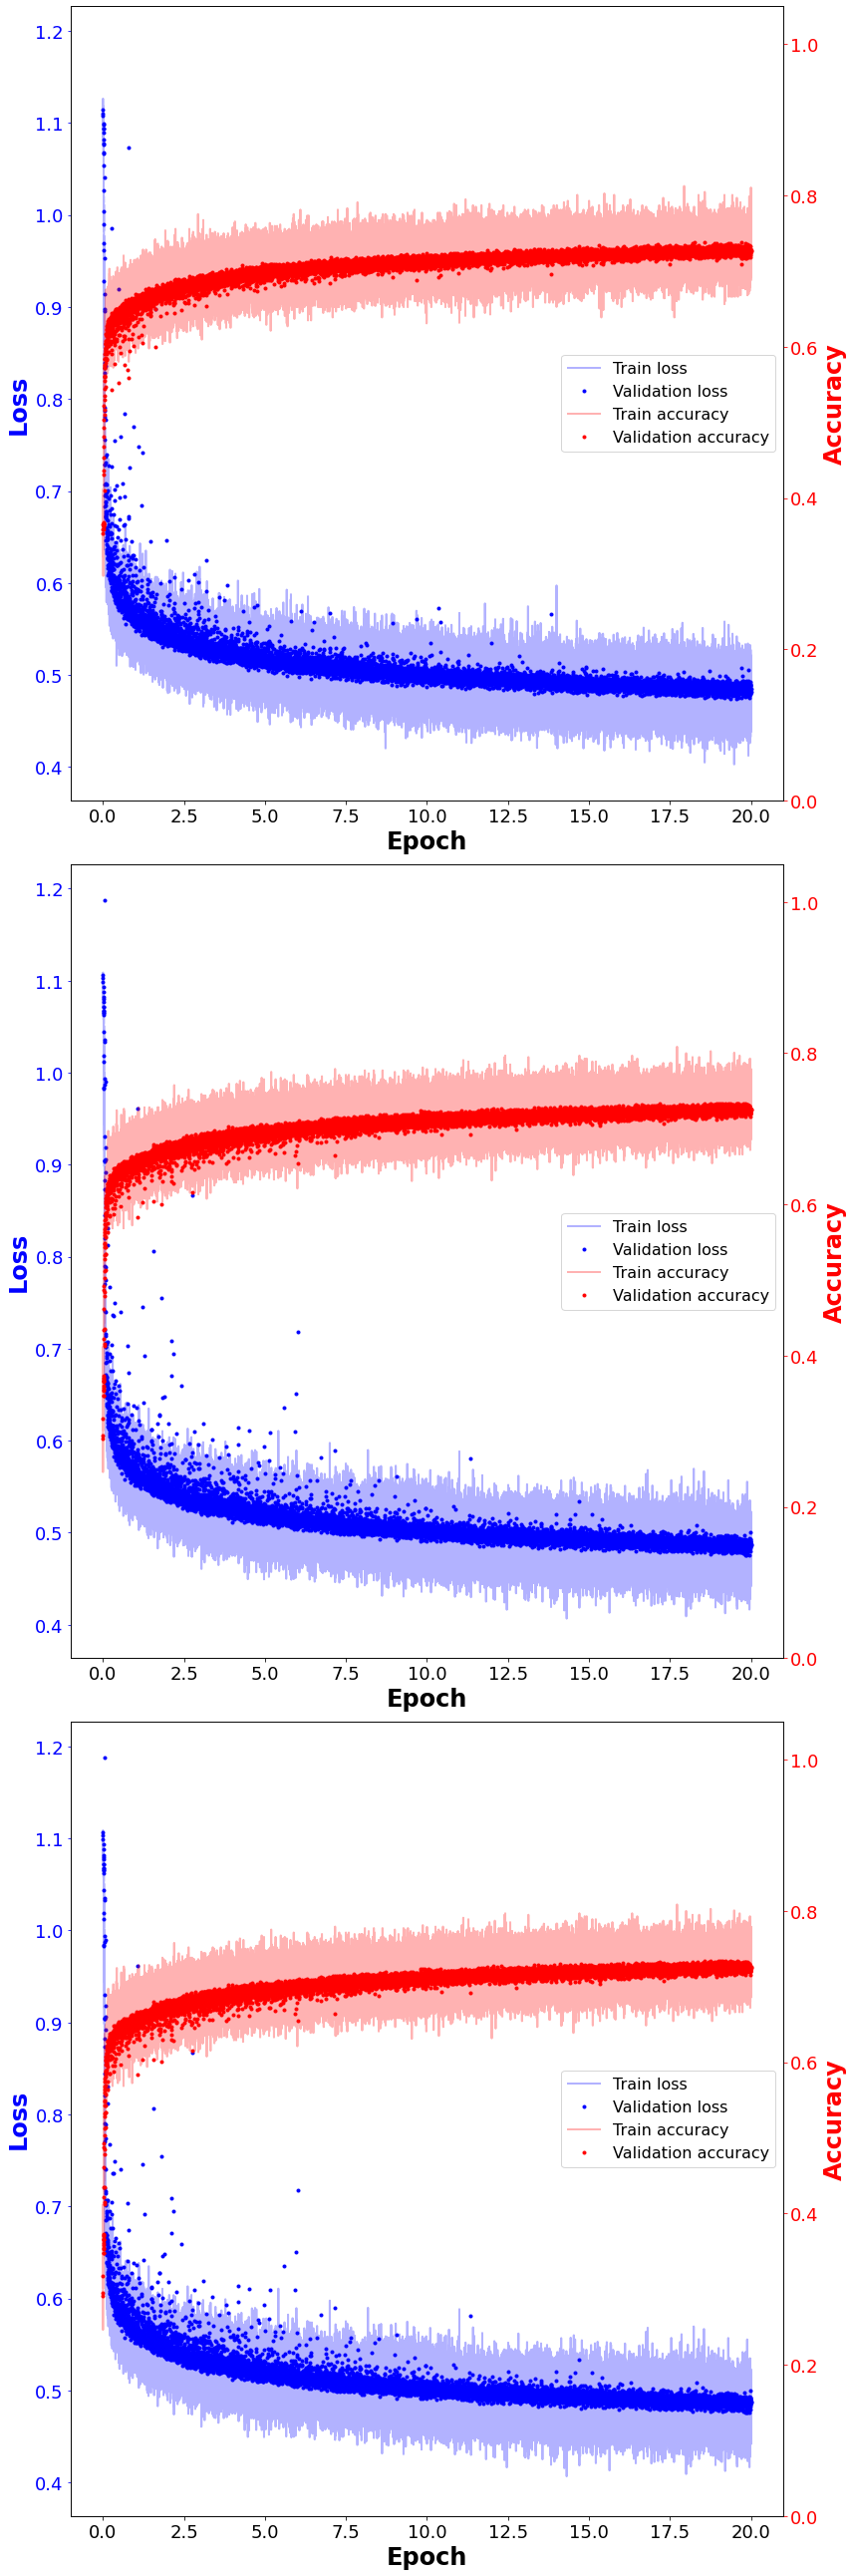

In [29]:
fig = multi_disp_learn_hist(locs,losslim=2.5,titles=titles,leg_font=15, title_font=15,xmax=20)

In [30]:
############# load old run data #############
idx_file_path = '/fast_scratch/WatChMaL/data/IWCD_fulltank_300_post_veto_nomichel_pe_idxs.npz'
indices = np.load(idx_file_path)['test_idxs']

cut_path = '/home/jtindall/indices/pointnet_cut_indices.npz'

cuts_to_apply= ['fq_failed', 'fq_flag']

raw_predicted_labels = [np.load(loc + "/predictions.npy") for loc in locs]
raw_output_softmax   = [np.load(loc + "/softmax.npy") for loc in locs]
raw_actual_labels    = [np.load(loc + "/labels.npy") for loc in locs]

In [31]:
############# apply cuts to data #############
predicted_labels = multi_get_masked_data(raw_predicted_labels, cut_path, indices, cuts_to_apply)
output_softmax   = multi_get_masked_data(raw_output_softmax, cut_path, indices, cuts_to_apply)
actual_labels    = multi_get_masked_data(raw_actual_labels, cut_path, indices, cuts_to_apply)

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\gamma$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\gamma$ Background Rejection'>]


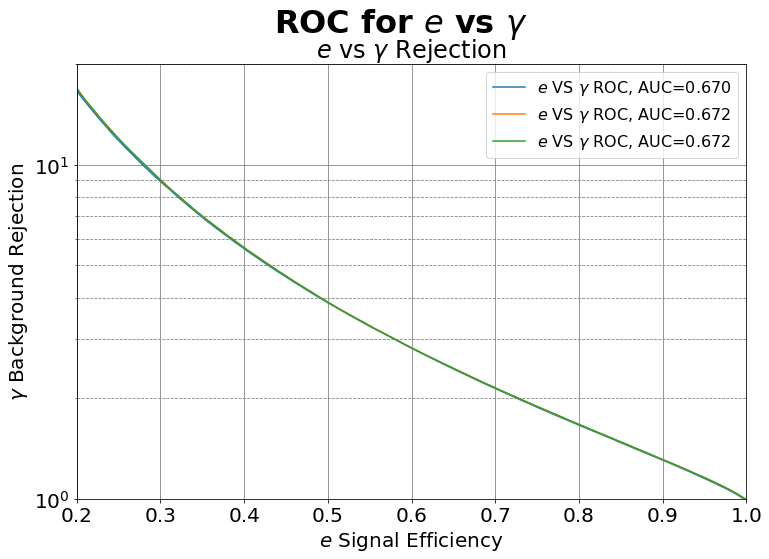

In [32]:
############# plot multi e/gamma ROC #############
fprs, tprs, thrs = multi_compute_roc(output_softmax, actual_labels, 
                                     true_label=label_dict["$e$"], 
                                     false_label=label_dict["$\gamma$"])

figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\gamma$", fig_list=[1], xlims=[[0.2,1.0]],ylims=[[1e0,2e1]], show=False)

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]
[<AxesSubplot:title={'center':'$e$ vs $\\mu$ Rejection'}, xlabel='$e$ Signal Efficiency', ylabel='$\\mu$ Background Rejection'>]


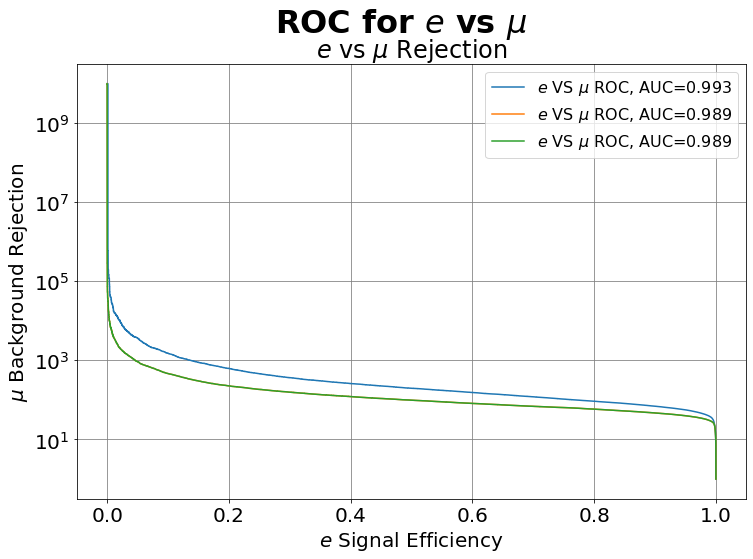

In [33]:
############# plot multi e/mu ROC #############
fprs, tprs, thrs = multi_compute_roc(output_softmax, actual_labels, 
                                     true_label=label_dict["$e$"], 
                                     false_label=label_dict["$\mu$"])

figs = multi_plot_roc(fprs, tprs, thrs, "$e$", "$\mu$", fig_list=[1], show=False)

In [34]:
############# plot collapsed ROC #############
"""
plot_list=["$e$", "$\gamma$"]
vs_list=["$\mu$"]
"""
collapsed_class_scores_list, collapsed_class_labels_list = multi_collapse_test_output(output_softmax, actual_labels, label_dict)

collapsed_class_labels_list = [collapsed_class_labels - 1 for collapsed_class_labels in collapsed_class_labels_list]
collapsed_class_scores_list = [collapsed_class_scores[:,1:] for collapsed_class_scores in collapsed_class_scores_list]

[<AxesSubplot:>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]
[<AxesSubplot:title={'center':'e/gamma vs mu Rejection'}, xlabel='e/gamma Signal Efficiency', ylabel='mu Background Rejection'>]


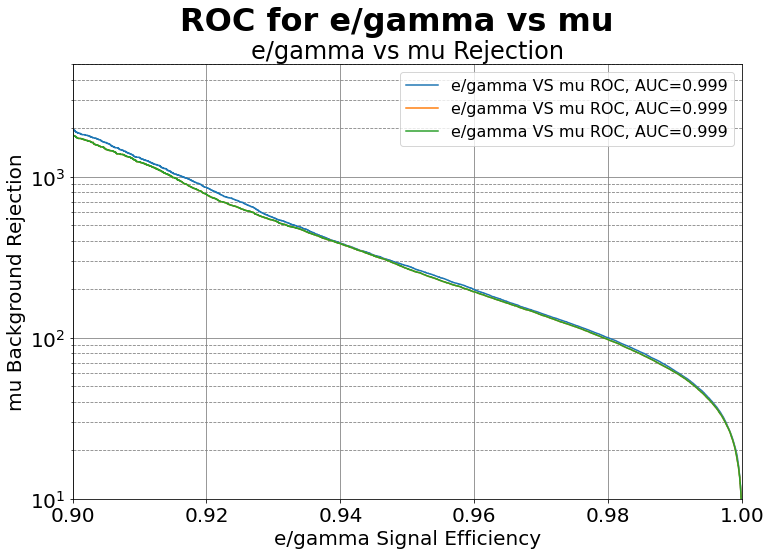

In [35]:
muon_softmax_index_dict = {"e/gamma":0, "mu":1}

fpr, tpr, thr = multi_compute_roc(collapsed_class_scores_list, collapsed_class_labels_list, 
                            true_label=muon_softmax_index_dict["e/gamma"], 
                            false_label=muon_softmax_index_dict["mu"])

figs = multi_plot_roc(fpr, tpr, thr,"e/gamma", "mu", fig_list=[1], xlims=[[0.9,1.0]],ylims=[[1e1,5e3]], show=False)